In [2]:
#GRADIENT DESCENT: another way to find local minimum of f(x), find x0 where f'(x0) = 0

#As usual, to find local minimum or local maximum, we solve f'(x) = 0 equation to find x
#However, sometimes, it is impossible to solve that equation (too much data, too many dimensions,...)
#In that case, have to use Gradient Descent method to find x where f'(x) = 0

#The idea is:
#    If f'(x0) > 0, we have to decrease x to reach f'(x) = 0, meaning x_new = x0 - delta
#    If f'(x0) < 0, we have to increase x to reach f'(x) = 0, meaning x_new = x0 + delta
#In both cases, delta is always has the opposite sign of f'(x) (trai dau)
#Therefore, we can replace delta with -p.f'(x)
#    (p is learning rate)

#Formula: x_new = x0 - p.f'(x0)

#Keep repeat this formula to find x_new from x0, then find another x_new2 from the old x_new
#....repeat until f'(x0) = 0 ===> x_new = x0 (converge point)
#Use the x at converge point to calculate local minimum of f(x)

#Choose the p wisely
#If p is too large, we will be bouncing back and forth around converge point without reaching it
#If p is too small, it will take more loops to reach the converge point, hence take more time

print('')

In [4]:
#-------Gradient Descent for Linear Regression------------#
#In Linear regression, we often use Leas-square Method (LSM) to find the linear line y^ = ax + b
#which means that we have to find a and b satisfying sum((yi -y^i)**2) or sum((yi - a.xi -b )**2) to be the minimum
#let f(x) = sum((yi - a.xi -b )**2), the problem is now solving f'(x) = 0 
#but it's not possible to do that since the size of x and y are too much
# ==> Use Gradient Descent to find the local minimum satisfying LSM

In [6]:
"""=============================================================================
Ex5: Gradient Descent
    Cho dữ liệu chiều cao heights (heights_1.txt), weights (weights_1.txt)
        1) Tạo 2 numpy array heights và weights chứa 2 danh sách từ 2 tập tin trên.
        2) Chuyển inches --> mét (h * 0.0254), lbs --> kg (w * 0.453592)
        3) Trực quan hóa dữ liệu theo heights, weights
        4) x = heights đã chuyển theo định dạng chuẩn, y = weights
        5) Với phương trình: y = mx + b (weights = (m * heights) + b) 
            gọi hàm tính m, b: theta = gradient_descent_2(alpha, x, y, 1000)
        6) Từ m, b (m = theta[1], b = theta[0]), dự đoán weights_predict theo m, b
        7) Trực quan hóa dữ liệu
        8) Với chiều cao là 1.8, 1.9, 2.0 thì cân nặng lần lượt là bao nhiêu?   
============================================================================="""
print('-------------GRADIENT DESCENT: Method 1---------------------------------')

-------------GRADIENT DESCENT: Method 1---------------------------------


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from matplotlib.gridspec import GridSpec

In [10]:
print('\n=============================================================')
print('*** 1) Read data heights_1.txt and weights_1.txt into numpy array heights and weights***')
print('=============================================================')
print()

#-------read heights----------#
f1 = open('data_Buoi6/heights_1.txt','r')
heights = np.array(eval(f1.read()))
f1. close

print(f'Heights (inches) array: {heights}')

#-------read weights----------#
f2 = open('data_Buoi6/weights_1.txt','r')
weights = np.array(eval(f2.read()))
f2.close

print(f'Weights (pounds) array: {weights}')

print()


*** 1) Read data heights_1.txt and weights_1.txt into numpy array heights and weights***

Heights (inches) array: [74 74 72 ... 75 75 73]
Weights (pounds) array: [180 215 210 ... 205 190 195]



In [12]:
print('\n=============================================================')
print('*** 2) convert from inches --> meters (*0.0254) and from lbs ---> kg (*0.453592) ***')
print('=============================================================')
print()

heights = heights*0.0254
print(f'Heights (metters) array: {heights}')

weights = weights*0.453592
print(f'Weights (kilogr) array: {weights}')

print()


*** 2) convert from inches --> meters (*0.0254) and from lbs ---> kg (*0.453592) ***

Heights (metters) array: [1.8796 1.8796 1.8288 ... 1.905  1.905  1.8542]
Weights (kilogr) array: [81.64656 97.52228 95.25432 ... 92.98636 86.18248 88.45044]




*** 3) Visualize the data with heights and weights (use jointplot) ***



<Figure size 400x400 with 0 Axes>

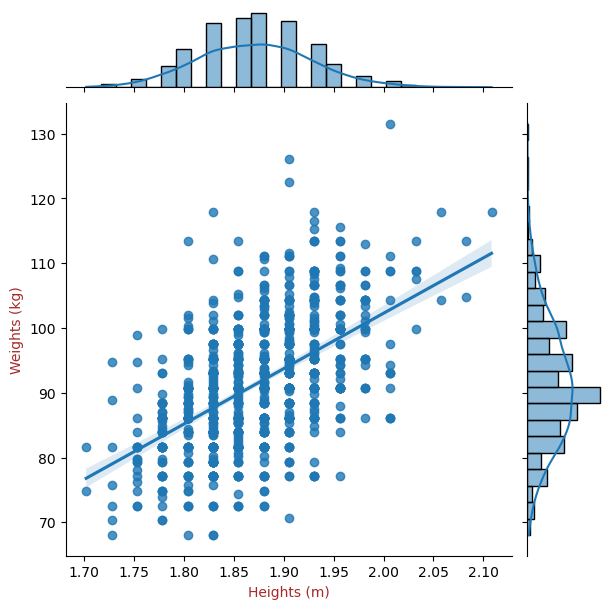

In [14]:
print('\n=============================================================')
print('*** 3) Visualize the data with heights and weights (use jointplot) ***')
print('=============================================================')
print()

plt.figure(figsize=(4,4))
sbn.jointplot(x=heights, y=weights, kind='reg')
#plt.title('Jointplot of heights(x) and weights(y)', size=20, color='brown')
plt.xlabel('Heights (m)', color='brown')
plt.ylabel('Weights (kg)', color='brown')
plt.show()

In [16]:
print('\n=============================================================')
print('*** 4) assign y = weights, x = heights but add one more columns containing only 1 values ***')
print('=============================================================')
print()

y = np.array(weights)
print(f'y = weights (kg) = {y}')

x = np.array(heights)
print(f'\nx = heights (m) = {x}')

x_1 = np.c_[np.ones(x.shape[0]),x]
#np.ones(x.shape[0]) to create an array containing only 1 digit with the len of x.shape[0]
#np.c_ is to stack 1-D array into another 1-D or 2-D array (add the 1-digit columns to the left of x, creating x_1 matrix)

print(f'\nx_1 = heights with 1-value column =\n {x_1}')


*** 4) assign y = weights, x = heights but add one more columns containing only 1 values ***

y = weights (kg) = [81.64656 97.52228 95.25432 ... 92.98636 86.18248 88.45044]

x = heights (m) = [1.8796 1.8796 1.8288 ... 1.905  1.905  1.8542]

x_1 = heights with 1-value column =
 [[1.     1.8796]
 [1.     1.8796]
 [1.     1.8288]
 ...
 [1.     1.905 ]
 [1.     1.905 ]
 [1.     1.8542]]


In [47]:
print('----------Try out some new things of sympy------------------')
import sympy as sp

m = sp.symbols('m') #to define m as a symbolic variable (theta[0] slope)
b = sp.symbols('b') #to define b as a symbolic variable (theta[1] bias)

#or m,b = sp.symbols('m b')

theta = np.array([b,m])
print('\nTheta vector =',theta)

y_hypo = np.dot(x_1,theta)

print('\nThe y_hypothesis (first 5 lines):')
for i in range(0,5):
    print(f'y_hypo_{i+1} = {y_hypo[i]}')

#Create loss function = sum((y[i] - y_hypo[i])**2)
loss = (1/(y.shape[0]))*sum((y[i] - y_hypo[i])**2 for i in range(y_hypo.shape[0]))
loss = sp.simplify(loss)
print('\nLoss(m,b) =', loss)

df_loss_m = sp.diff(loss,m)
print(f'\nDifferentiation of loss(m,b) respect to m = {df_loss_m}')

df_loss_b = sp.diff(loss,b)
print(f'\nDifferentiation of loss(m,b) respect to b = {df_loss_b}')

df_loss_m_2_3 = df_loss_m.subs({m:2,b:3}) 
#.subs({m:2,b:3}) to substitute m=2 and b=3 into the df_error_m function
# therefore calculate the df_error_m at m=2 and b=3
print('\nDifferentiation of error(m,b) respect to m at m=2 and b=3', df_loss_m_2_3)

----------Try out some new things of sympy------------------

Theta vector = [b m]

The y_hypothesis (first 5 lines):
y_hypo_1 = 1.0*b + 1.8796*m
y_hypo_2 = 1.0*b + 1.8796*m
y_hypo_3 = 1.0*b + 1.8288*m
y_hypo_4 = 1.0*b + 1.8288*m
y_hypo_5 = 1.0*b + 1.8542*m

Loss(m,b) = 0.999999999999997*b**2 + 3.74343448275862*b*m - 182.660381178325*b + 3.50677639657143*m**2 - 342.478151134023*m + 8430.32758966886

Differentiation of loss(m,b) respect to m = 3.74343448275862*b + 7.01355279314286*m - 342.478151134023

Differentiation of loss(m,b) respect to b = 1.99999999999999*b + 3.74343448275862*m - 182.660381178325

Differentiation of error(m,b) respect to m at m=2 and b=3 -317.220742099462


In [98]:
print('\n=============================================================')
print('*** 5) Find the y_hypothesis = mx + b linear regression model ***')
print('       b is theta[0] or bias')
print('       m is theta[1] is slope')
print('=============================================================')
print()
#--------------build gradient descent function for linear LSM model---------------#
def gradient_descent_linearLSM (x,y, tolerance=10**(-30)):
    
    import sympy as sp
    m = sp.symbols('m') #to define m as a symbolic variable (theta[0] slope)
    b = sp.symbols('b') #to define b as a symbolic variable (theta[1] bias)

    theta = np.array([b,m])
    print('Theta vector =',theta)
    
    x_1 = np.c_[np.ones(x.shape[0]),x]
    #np.ones(x.shape[0]) to create an array containing only 1 digit with the len of x.shape[0]
    #np.c_ is to stack 1-D array into another 1-D or 2-D array (add the 1-digit columns to the left of x, creating x_1 matrix)
    
    y_hypo = np.dot(x_1,theta) 
    #theta = [b m] and x_1[i] = [1 xi] so np.dot(x_1,theta) = y_hypo = b + m*xi

    print('\nThe y_hypothesis = x_1.dot(theta) (first 5 lines):')
    for i in range(0,5):
        print(f'y_hypo_{i+1} = {y_hypo[i]}')

    #Create loss function = sum((y[i] - y_hypo[i])**2)
    loss = (1/(y.shape[0]))*sum((y[i] - y_hypo[i])**2 for i in range(y_hypo.shape[0]))

    df_loss_m = sp.diff(loss,m)
    print(f'\nDifferentiation of loss(m,b) respect to m = {df_loss_m}')

    df_loss_b = sp.diff(loss,b)
    print(f'\nDifferentiation of loss(m,b) respect to b = {df_loss_b}')

    #***************Gradient descent part**************************#
    b_temp = 5 #set initial bias value
    m_temp = 5 #set initial slope value
    learn_rate = 10       #set initial learning rate

    df_point_b = float(df_loss_b.subs({b:b_temp, m:m_temp}))
    df_point_m = float(df_loss_m.subs({b:b_temp, m:m_temp}))
    
    loop = 1
    while True:        
        b_new = b_temp - learn_rate*df_point_b
        m_new = m_temp - learn_rate*df_point_m
        
        if (np.abs(m_new-m_temp) <= tolerance) and (np.abs(b_new-b_temp) <= tolerance): break #if the gap between point_new and point <= tolerance, stop the loop      
        else:
            df_point_b_old = df_point_b
            df_point_m_old = df_point_m
            
            df_point_b = float(df_loss_b.subs({b:b_new, m:m_new}))
            df_point_m = float(df_loss_m.subs({b:b_new, m:m_new}))
            
            b_temp = b_new #update point as point_new for next loop
            m_temp = m_new
            
            if np.sign(df_point_b) != np.sign(df_point_b_old) or np.sign(df_point_m) != np.sign(df_point_m_old):
                learn_rate = learn_rate/2
            else: pass
            # #if f'(x) change sign, then reduce the lear_rate
            
            loop +=1 #count the number of loops needed to find convergence_point
            
    theta1 = m_new #slope            
    theta0 = b_new #bias
    
    print(f'\nAfter {loop} loops, theta[bias,slope] = {[theta0,theta1]}')

    return float(theta0), float(theta1)
    #sympy class return symbolic expression type value, with dtype = '0'
    # so have to convert to float before returnning for visualization or other task


*** 5) Find the y_hypothesis = mx + b linear regression model ***
       b is theta[0] or bias
       m is theta[1] is slope



In [100]:
#-----------Use function to find bias and slope----------------#
bias, slope = gradient_descent_linearLSM(heights,weights)

Theta vector = [b m]

The y_hypothesis = x_1.dot(theta) (first 5 lines):
y_hypo_1 = 1.0*b + 1.8796*m
y_hypo_2 = 1.0*b + 1.8796*m
y_hypo_3 = 1.0*b + 1.8288*m
y_hypo_4 = 1.0*b + 1.8288*m
y_hypo_5 = 1.0*b + 1.8542*m

Differentiation of loss(m,b) respect to m = 3799.58599999999*b + 7118.75608504*m - 347615.323401033

Differentiation of loss(m,b) respect to b = 2030.0*b + 3799.58599999999*m - 185400.286896

After 1485427 loops, theta[bias,slope] = [-68.55285156228878, 85.42051043651777]


In [115]:
print('\n=============================================================')
print('*** 6) Use y_hypo = m*x + b to finds weights_predict values from given heights***')
print('=============================================================')
print()

#Use the model to calculate weights_predict values/array from heights array
weights_predict = slope*heights + bias
print(f'weights_predict values = {slope}*heights + {bias} =\n {weights_predict}')

print(f'\nError = weights - weights_predict =\n {weights - weights_predict}')


*** 6) Use y_hypo = m*x + b to finds weights_predict values from given heights***

weights_predict values = 85.42051043651777*heights + -68.55285156228878 =
 [92.00353985 92.00353985 87.66417792 ... 94.17322082 94.17322082
 89.83385889]

Error = weights - weights_predict =
 [-10.35697985   5.51874015   7.59014208 ...  -1.18686082  -7.99074082
  -1.38341889]



*** 7) Visualize weights (y) and weights_predict (y_hypo) along with heights (x)***


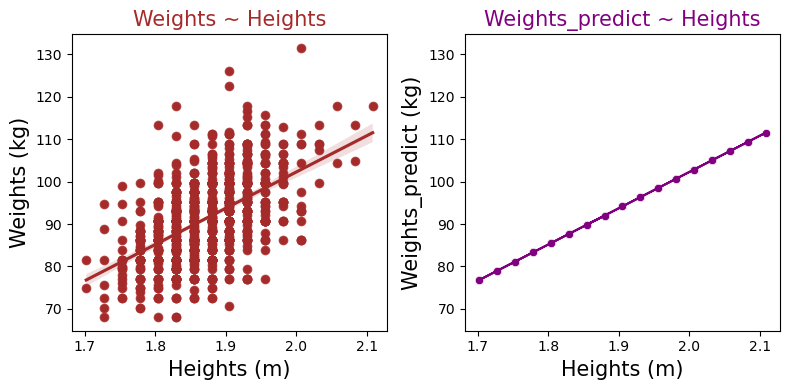

In [112]:
print('\n=============================================================')
print('*** 7) Visualize weights (y) and weights_predict (y_hypo) along with heights (x)***')
print('=============================================================')

#weights_predict = np.asarray(weights_predict, dtype=float) #convert the weights_predict dtype from '0' to float to visualize it

fig = plt.figure(figsize=(8,4))
grsp = GridSpec(nrows=1, ncols=2)

weights_fig = fig.add_subplot(grsp[0,0])
sbn.scatterplot(x=heights, y=weights, color='brown') #draw scatter plot
sbn.regplot(x=heights, y=weights, color='brown')            #draw line
weights_fig.set_xlabel('Heights (m)', size=15)
weights_fig.set_ylabel('Weights (kg)', size=15)
weights_fig.set_title('Weights ~ Heights',size=15,color='brown')

weights_predict_fig = fig.add_subplot(grsp[0,1], sharey = weights_fig) #sharey=weights_fig to use the same y axis scale like weights_fig
sbn.scatterplot(x=heights, y=weights_predict, color='purple')
plt.plot(heights, weights_predict, color='purple')
weights_predict_fig.set_xlabel('Heights (m)', size=15)
weights_predict_fig.set_ylabel('Weights_predict (kg)', size=15)
weights_predict_fig.set_title('Weights_predict ~ Heights',size=15,color='purple')

plt.tight_layout()

plt.show()

In [106]:
print('\n=============================================================')
print('*** 7) Given heights are 1.8, 1.9, 2.0. What are the weights_predict? ***')
print('=============================================================')

for height in [1.8, 1.9, 2.0]:
    print(f'\nIf height is {height} (m) then weight_predict = {slope}*{height} + {bias} = {slope*height + bias} kg')


*** 7) Given heights are 1.8, 1.9, 2.0. What are the weights_predict? ***

If height is 1.8 (m) then weight_predict = 85.42051043651777*1.8 + -68.55285156228878 = 85.2040672234432 kg

If height is 1.9 (m) then weight_predict = 85.42051043651777*1.9 + -68.55285156228878 = 93.74611826709499 kg

If height is 2.0 (m) then weight_predict = 85.42051043651777*2.0 + -68.55285156228878 = 102.28816931074677 kg


In [45]:
print(sp.simplify(loss))

0.999999999999997*b**2 + 3.74343448275862*b*m - 182.660381178325*b + 3.50677639657143*m**2 - 342.478151134023*m + 8430.32758966886
